In [6]:
%load_ext autoreload
%autoreload 2

import datetime as dt
import numpy as np
import pandas as pd

from mcstools.loader import L2Loader
from mcstools.mcsfile import L2File
import mcstools.preprocess.l2.filter_and_bin as filt

"""
Search DDR1 records over some time range and
find profiles within various bounds.
"""

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'\nSearch DDR1 records over some time range and\nfind profiles within various bounds.\n'

In [17]:
cp = filt.ConfigParser()
y = cp.load_config("../../../test/config_test.yaml")
y

Loading config from ../../../test/config_test.yaml


{'filter': {'Obs_qual': [0, 1, 10]},
 'location': {'dt': datetime.datetime(2007, 12, 22, 16, 20, 20),
  'Profile_lat': -6.6,
  'Profile_lon': 86,
  'LTST': 0.0958},
 'bin': {'L_s': (0, 360, 5),
  'Profile_lat': (-90, 90, 15),
  'Profile_lon': (-180, 180, 15),
  'LTST': (0, 1, 0.25)}}

In [2]:
# First set/generate filter and binning configs
filter_config = {
    "Obs_qual": [0, 1, 10]
}

loc_info = {
    "dt": dt.datetime(2007, 12, 22, 16, 20, 20),
    "Profile_lat": -6.6,
    "Profile_lon": 86,
    "LTST": 2.3/24
}

bin_config = {
    "L_s": (0, 360, 5),
    "Profile_lat": (-90, 90, 15),
    "Profile_lon": (-180, 180, 15),
    "LTST": (0, 1, 6/24.)
}


filter_config = filt.generate_filter_config_from_location_and_bins(loc_info, bin_config, filter_config=filter_config)

In [5]:
data_dir = None
if data_dir:
    l2loader = L2Loader(mcs_data_path = data_dir)
else:
    l2loader = L2Loader(pds=True)
if "dt" in filter_config.keys() and "Ls" not in filter_config.keys():
    ddr1 = l2loader.load_date_range(*filter_config["dt"], ddr="DDR1", add_cols=["dt"])
    print(ddr1)
reduced_ddr1 = filt.filter_ddr1_df_from_config(ddr1, filter_config)
print(reduced_ddr1)
binned = filt.bin_ddr1_profiles(reduced_ddr1, bin_config)
print(binned[list(bin_config.keys())+[f"{x}_mid" for x in bin_config.keys()]])

Loading L2 DDR1 data from 2007-12-19 18:26:18.597210+00:00 - 2007-12-30 00:25:04.998928+00:00
       1         Date           UTC           SCLK      L_s    Solar_dist  \
256    0  19-Dec-2007  18:26:21.789  882556001.497  4.99974  2.348425e+08   
257    0  19-Dec-2007  18:26:52.516  882556032.217  4.99991  2.348426e+08   
258    0  19-Dec-2007  18:27:23.234  882556062.937  5.00008  2.348426e+08   
259    0  19-Dec-2007  18:27:53.953  882556093.657  5.00026  2.348427e+08   
260    0  19-Dec-2007  18:28:24.672  882556124.376  5.00044  2.348427e+08   
...   ..          ...           ...            ...      ...           ...   
26262  0  30-Dec-2007  00:22:43.510  883441383.224  9.99839  2.366355e+08   
26263  0  30-Dec-2007  00:23:14.230  883441413.944  9.99856  2.366355e+08   
26264  0  30-Dec-2007  00:23:44.949  883441444.664  9.99873  2.366356e+08   
26265  0  30-Dec-2007  00:24:15.669  883441475.384  9.99891  2.366357e+08   
26266  0  30-Dec-2007  00:24:46.389  883441506.104  9.99908

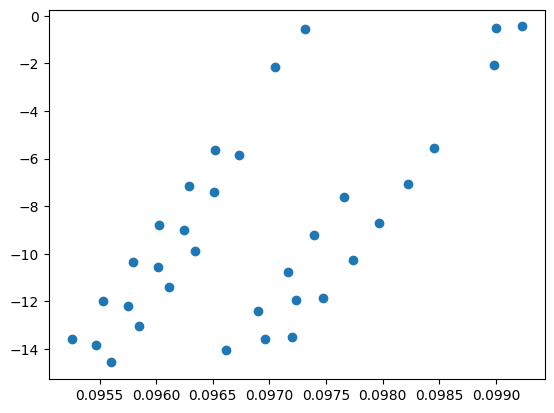

In [152]:
plt.figure()
plt.scatter(reduced_ddr1["LTST"], reduced_ddr1["Profile_lat"])

In [153]:
profiles = reduced_ddr1["Profile_identifier"]

In [154]:
ddr2 = L2Loader(pds=True).load("DDR2", profiles=profiles)

In [155]:
ddr2.dropna(subset="T", inplace=True)

<AxesSubplot: >

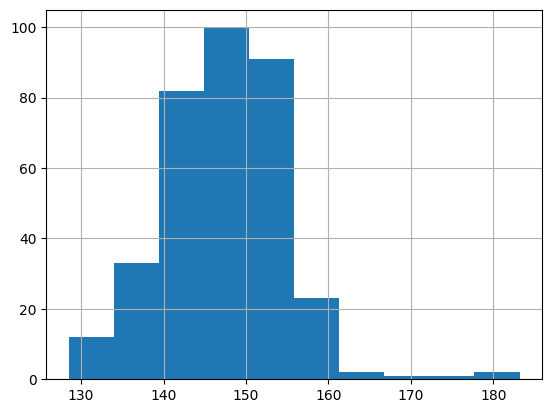

In [158]:
ddr2[ddr2["Alt"].between(43, 53)]["T"].hist()

<AxesSubplot: >

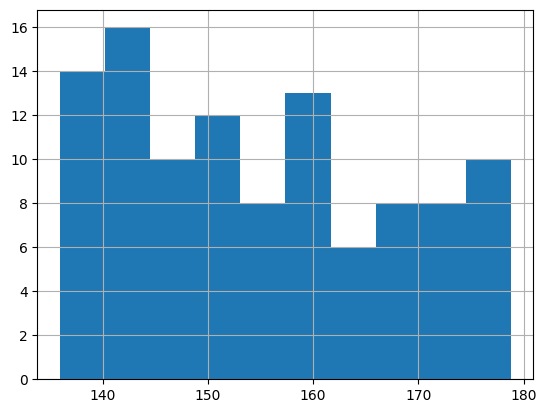

In [123]:
ddr2[ddr2["level"].between(40, 60)]["T"].hist()

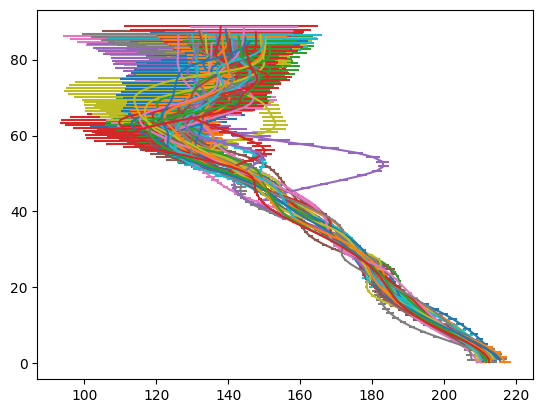

In [161]:
import matplotlib.pyplot as plt
plt.figure()
for prof in profiles:
    pdf = ddr2[ddr2["Profile_identifier"]==prof]
    plt.errorbar(pdf["T"], pdf["Alt"], xerr=pdf["T_err"])
#plt.ylim(1000, 0.01)
#plt.yscale("log")
plt.show()

In [63]:
ex_profile = ddr2.groupby("Profile_identifier").get_group("070101080000_219")

In [80]:
import xarray as xr
ex_xr = xr.Dataset(
    data_vars={"T": (["level"], ex_profile["T"])},
    coords={
        "level": ("level", ex_profile["level"]),
        "Pres": ("level", ex_profile["Pres"]),
        "Alt": ("level", ex_profile["Alt"]),
    }
)["T"]
print(ex_xr)

<xarray.DataArray 'T' (level: 105)>
array([    nan,     nan,     nan,     nan,     nan,     nan,     nan,
           nan,     nan, 220.392, 219.762, 218.541, 216.694, 214.315,
       211.436, 208.329, 205.202, 202.288, 199.695, 197.481, 195.695,
       194.251, 193.09 , 192.157, 191.308, 190.362, 189.271, 188.039,
       186.634, 185.018, 183.198, 181.338, 179.777, 178.812, 178.469,
       178.521, 178.691, 178.821, 178.845, 178.653, 178.092, 177.102,
       175.693, 173.883, 171.629, 168.847, 165.598, 162.225, 159.049,
       156.199, 153.679, 151.407, 149.337, 147.477, 145.841, 144.408,
       143.115, 141.91 , 140.783, 139.777, 139.004, 138.605, 138.6  ,
       138.97 , 139.57 , 140.163, 140.561, 140.683, 140.599, 140.535,
       140.747, 141.401, 142.521, 143.856, 144.885, 145.178, 144.583,
       143.37 , 142.198, 141.644, 141.957, 143.   , 144.163, 144.821,
       144.648, 143.722, 142.504, 141.429, 140.708, 140.338, 140.152,
       140.023, 139.91 , 139.805,     nan,     nan,   

In [88]:
ddr2_xr = ddr2.set_index(
    ["Profile_identifier", "level"]
)[["Pres", "Alt", "T", "T_err", "Dust", "Dust_err", "H2Oice", "H2Oice_err", "Lat", "Lon"]].to_xarray()

#ddr2_xr.assign_coords({"L_s_mid": 157.5}, )
ddr2_xr = ddr2_xr.assign_coords({"Pres":ddr2_xr["Pres"], "Alt":ddr2_xr["Alt"]})
ddr2_xr

<xarray.Dataset>
Dimensions:             (Profile_identifier: 5, level: 105)
Coordinates:
  * Profile_identifier  (Profile_identifier) object '070101080000_219' ... '0...
  * level               (level) int64 0 1 2 3 4 5 6 ... 99 100 101 102 103 104
    Pres                (Profile_identifier, level) float64 1.879e+03 ... 0.0...
    Alt                 (Profile_identifier, level) float64 nan nan ... 105.0
Data variables:
    T                   (Profile_identifier, level) float64 nan nan ... nan nan
    T_err               (Profile_identifier, level) float64 nan nan ... nan nan
    Dust                (Profile_identifier, level) float64 nan nan ... nan nan
    Dust_err            (Profile_identifier, level) float64 nan nan ... nan nan
    H2Oice              (Profile_identifier, level) float64 nan nan ... nan nan
    H2Oice_err          (Profile_identifier, level) float64 nan nan ... nan nan
    Lat                 (Profile_identifier, level) float64 nan nan ... 11.82
    Lon                 (Profile_identifier, level) float64 nan nan ... -4.149

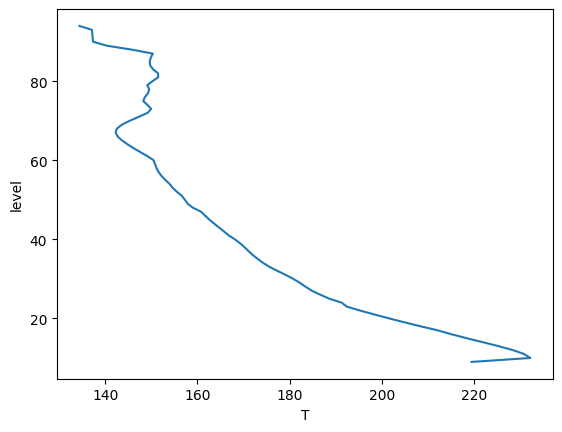

In [94]:
ddr2_xr.median("Profile_identifier")["T"].plot(y="level")

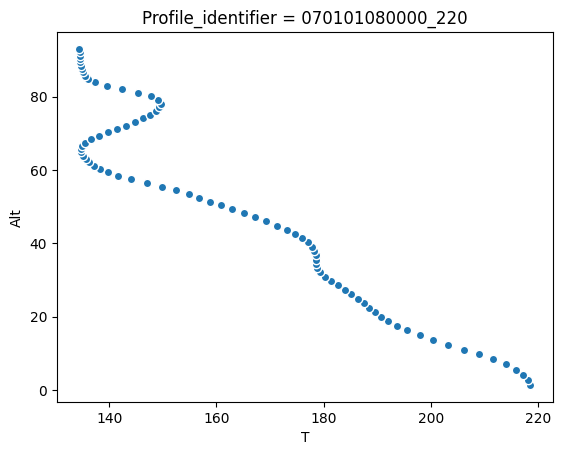

In [47]:
ddr2.set_index(
    ["Profile_identifier", "level"]
)[["Pres", "T", "Alt"]].to_xarray().isel(Profile_identifier=1).plot.scatter(x="T", y="Alt")